In [1]:
#Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Reading CSV Dataset
df_NBA = pd.read_csv('NBA_salary.csv')
df_NBA.head()


,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [9]:
#DF Key information
df_NBA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   573 non-null    int64  
 1   Player       573 non-null    object 
 2   Tm           573 non-null    object 
 3   season17_18  573 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 18.0+ KB


In [10]:
#Renaming and deleting columns
df_NBA.columns = ['cod', 'player', 'team', 'salary']
del df_NBA['cod']
df_NBA.head()


,player,team,salary
0,Stephen Curry,GSW,34682550.0
1,LeBron James,CLE,33285709.0
2,Paul Millsap,DEN,31269231.0
3,Gordon Hayward,BOS,29727900.0
4,Blake Griffin,DET,29512900.0


---
## Visualizing players by team

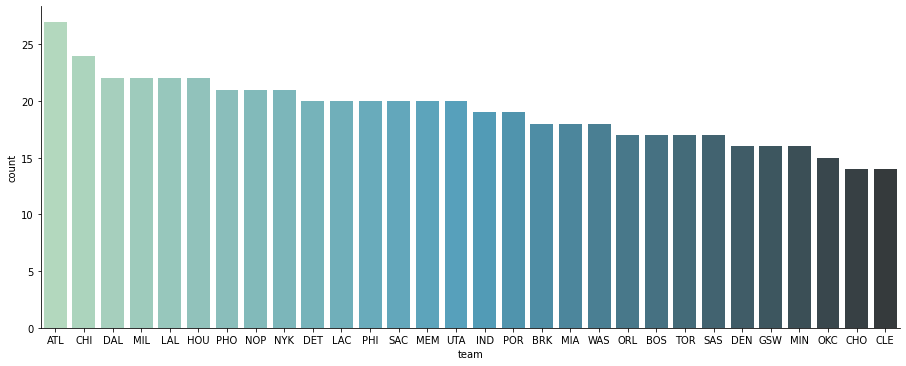

In [11]:
team_index = df_NBA['team'].value_counts()
sns.catplot(data=df_NBA,
            x='team',
            order=team_index.index,
            kind='count',
            aspect=2.5,
            palette='GnBu_d')

## Salary Distribution

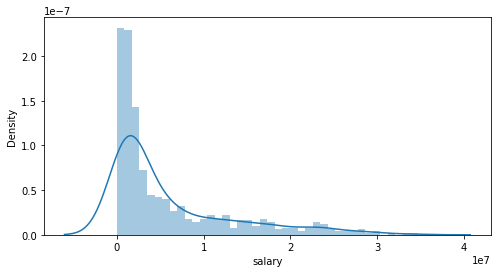

In [12]:
#Histogram and KDE
plt.figure(figsize=(8, 4))
sns.distplot(df_NBA['salary'], bins=40)


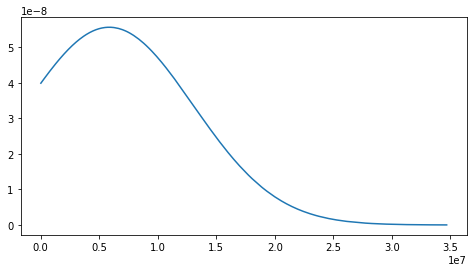

In [13]:
#Probability Density Function (PDF) Chart
x = df_NBA['salary']

plt.figure(figsize=(8, 4))
plt.plot(x, st.norm.pdf(x, x.mean(), x.std()))
plt.show()


_Based on the probability density function plot is possible to identify a normal distibution, however, with a huge bilateral symmetry (right). Using a logarithm function is possible to "correct" it._

## Normalizing the salary data

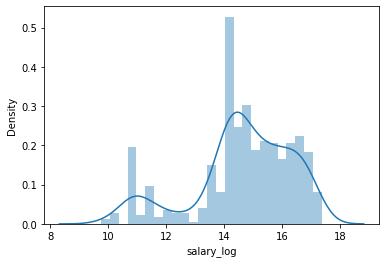

In [14]:
#Creating a column with the salary log to normalize the distribution
df_NBA['salary_log'] = np.log1p(df_NBA['salary'])
sns.distplot(df_NBA['salary_log'], bins=25)


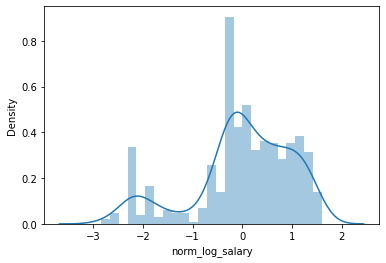

In [15]:
#Dividing by the mean and standard deviation to standardize the serie in a new column
df_NBA['norm_log_salary'] = ((df_NBA['salary_log'] - df_NBA['salary_log'].mean()) / df_NBA['salary_log'].std())
sns.distplot(df_NBA['norm_log_salary'], bins=25)


## Mean and Standard Deviation

In [16]:
print(f"""Mean: {df_NBA.norm_log_salary.mean():.4f}
Standard: {df_NBA.norm_log_salary.std():.4f}""") 


Mean: 0.0000
Standard: 1.0000


Bentuk normal standar sehingga Mean dan standard deviasi adalah 0,1

In [32]:
#Berapa point estimation dari rata-rata salary?
mean_salary = df_NBA.salary.mean()
print ('x bar is '+ str(mean_salary))

x bar is 5858945.886561954


In [39]:
#berapa rata-rata salary tertinggi berdasarkan team ?
df_NBA.groupby("team")['salary'].mean().sort_values(ascending=False).head(3)

team
CLE    9.806325e+06
OKC    8.952937e+06
GSW    8.593428e+06
Name: salary, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


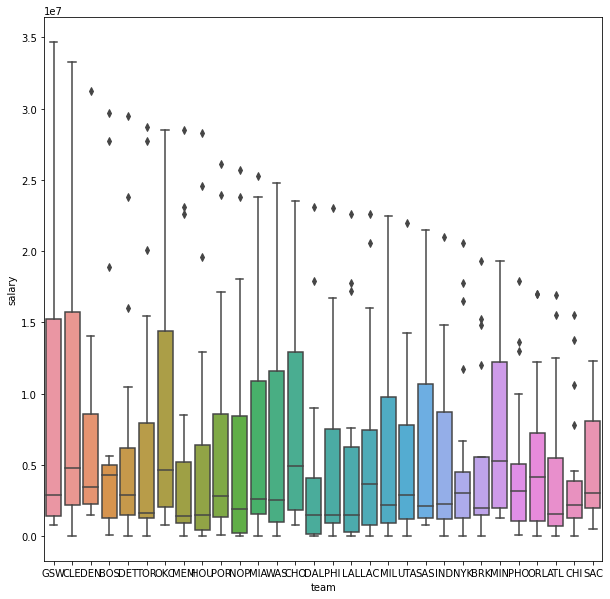

In [41]:
import seaborn as sns
plt.figure(figsize=(10, 10))
OS = sns.boxplot(x="team", y="salary", data=df_NBA)
print(OS)

AxesSubplot(0.125,0.125;0.775x0.755)


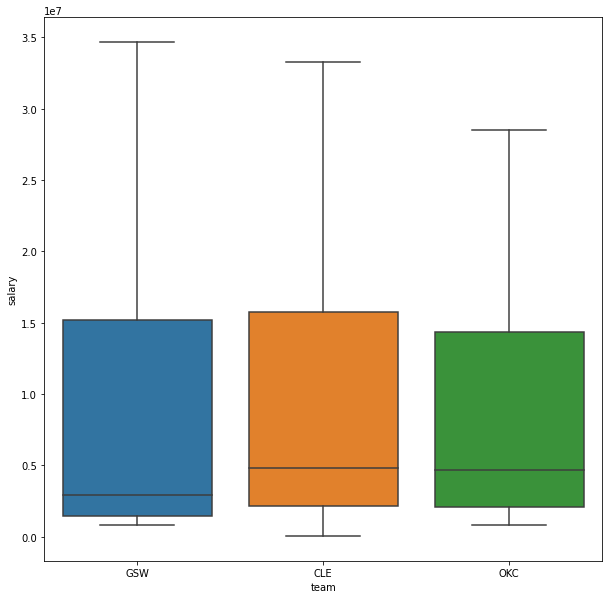

In [42]:
#boxplot dengan rata2 salary 3 team tertinggi
list_team = ['CLE','OKC','GSW']
filter_3_team= df_NBA[df_NBA['team'].isin(list_team)]
plt.figure(figsize=(10, 10))
OS1 = sns.boxplot(x="team", y="salary", data=filter_3_team)
print(OS1)

In [35]:
#Berapakah 95% Confidence Interval dari rata-rata salary yang kategori 3 kategori tertinggi?
#filter dulu berdasarkan team dengan salary tertinggi
team_cle = df_NBA[df_NBA['team']=='CLE']
#standar deviation
std = team_cle.salary.std()
print ('standar deviation is '+ str(std))
#sample size
n = np.sqrt(len(team_cle))
print ('sample size is '+ str(n))
# margin error
e = 1.96*(std/n)
print ('margin error is '+ str(e))
#Confidence Interval
print ('CI 95% from salary of CLE between ' + str(mean_salary-e) +','+ str(mean_salary+e))

standar deviation is 10163157.541681465
sample size is 3.7416573867739413
margin error is 5323787.4884291645
CI 95% from salary of CLE between 535158.3981327899,11182733.374991119


## P-Value to  2 std

In [44]:
norm_mean = df_NBA.norm_log_salary.mean()
norm_std = df_NBA.norm_log_salary.std()

p_value = st.norm(norm_mean, norm_std).sf(2*norm_std) * 2 #to sides
p_value
#p-value kurang dari 0,05 sehingga berada diluar area distribusi normal.


0.04550026389635878

## Calculating z-score

In [ ]:
z_score_inf = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[0]
z_score_sup = st.norm.interval(alpha=0.95, loc=norm_mean, scale=norm_std)[1]

print(f'{z_score_inf:.4f} <--------> {z_score_sup:.4f}')


-1.9600 <--------> 1.9600


__With the Alpha limits of 0.95 we can run the inference and find out which players are earning above or below average with a 95% confidence level.__

---

## Hypothesis:
Pada musim 2017-2018 apakah ada pemain NBA yang memiliki gaji **tinggi** atau **rendah** daripada rata-rata?

---
### __Lower than the average__


In [ ]:
#Players
df_NBA_lower = df_NBA[df_NBA['norm_log_salary'] < z_score_inf]
df_NBA_lower


,player,team,salary,salary_log,norm_log_salary
528,Demetrius Jackson,HOU,74159.0,11.213980,-1.988587
529,Georgios Papagiannis,POR,74159.0,11.213980,-1.988587
530,Larry Drew,NOP,74159.0,11.213980,-1.988587
531,Scotty Hopson,DAL,74159.0,11.213980,-1.988587
532,Isaiah Canaan,HOU,53465.0,10.886801,-2.179385
533,Tyler Cavanaugh,ATL,50000.0,10.819798,-2.218459
534,Kyle Collinsworth,DAL,50000.0,10.819798,-2.218459
535,Demetrius Jackson,HOU,50000.0,10.819798,-2.218459
536,Daniel Ochefu,WAS,50000.0,10.819798,-2.218459
537,Michael Young,WAS,50000.0,10.819798,-2.218459


In [ ]:
#Players by team
team_index = df_NBA_lower['team'].value_counts()
team_index


DAL    5
HOU    5
LAL    4
ATL    3
MIL    3
NOP    3
UTA    3
CHI    2
DET    2
PHI    2
MEM    2
WAS    2
POR    1
NYK    1
MIA    1
CLE    1
BRK    1
IND    1
ORL    1
TOR    1
LAC    1
Name: team, dtype: int64

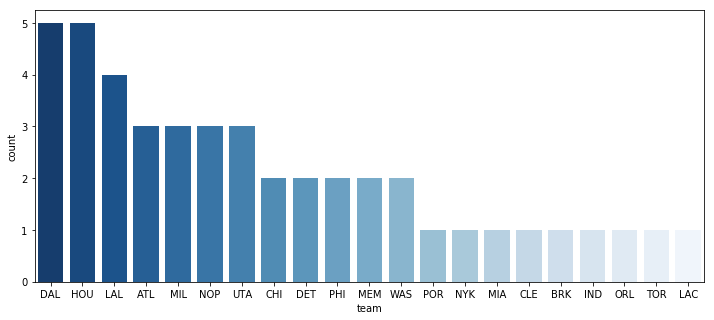

In [ ]:
#Plot players by team
plt.figure(figsize=(12, 5))
sns.countplot(df_NBA_lower['team'],
              order=team_index.index,
              palette='Blues_r')


In [ ]:
print(f"""Players with a lower salary than the average: 
Total - {df_NBA_lower.shape[0]}
Rate - {df_NBA_lower.shape[0] / df_NBA.shape[0] * 100:.2f}%""")


Players with a lower salary than the average: 
Total - 45
Rate - 7.85%


Berdasarkan Dataset itu kita dapat menegaskan dengan kepastian 95% bahwa saat ini ada __45 players__ berpenghasilan kurang dari gaji rata-rata. Ini mewakili total __7.85%__.
Jadi: **Gagal menolak H0**

---

### __Higher than the average__


In [ ]:
#Players
df_NBA_higher = df_NBA[df_NBA['norm_log_salary'] > z_score_sup]
df_NBA_higher


,player,team,salary,salary_log,norm_log_salary


In [ ]:
print(f"""Players with a higher salary than the average: 
Total - {df_NBA_higher.shape[0]}
Rate - {df_NBA_higher.shape[0] / df_NBA.shape[0] * 100:.2f}%""")


Players with a higher salary than the average: 
Total - 0
Rate - 0.00%


In [ ]:
#p-value and alpha max to the highest salary
p_value = st.norm(norm_mean, norm_std).sf(df_NBA['norm_log_salary'].max())
alpha = 1 - p_value
print(f'P-value: {p_value:.3f}\nAlpha Max: {alpha:.3f}\nWe can confirm that the highest salary is on the distribution!')


P-value: 0.055
Alpha Max: 0.945
We can confirm that the highest salary is on the distribution!


Based on that Dataset we can affirm with 95% certainty that currently there are __no__ players earning higher than the average salary. The highest salary is on the average distribution. Therefore: **Reject H0**

In [46]:
#melakukan uji t-test 2 sampel. antara team CLE dan Team GSW
from scipy.stats import ttest_ind
import numpy as np
team_cle = df_NBA[df_NBA['team']=='CLE']['salary']
team_gsw=df_NBA[df_NBA['team']=='GSW']['salary']
cle_mean = np.mean(team_cle)
gsw_mean = np.mean(team_gsw)
print("cle mean value:",cle_mean)
print("gsw mean value:",gsw_mean)
cle_std = np.std(team_cle)
gsw_std = np.std(team_gsw)
print("cle std value:",cle_std)
print("gsw std value:",gsw_std)
ttest,pval = ttest_ind(team_cle,team_gsw)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

cle mean value: 9806324.92857143
gsw mean value: 8593427.8125
cle std value: 9793463.657757653
gsw std value: 9912966.478798136
p-value 0.7477309462545472
we accept null hypothesis


dengan gagal tolak H0 artinya tidak ada perbedaan antara rata-rata gaji team CLE dan teamn GSW